In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from sklearn.decomposition import PCA
import pickle

In [5]:
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb')) #load data
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.003076,0.002907,0.002891,0.002784,0.002830,0.002845,0.002753,0.002707,0.002907,0.002768,...,0.001630,0.001661,0.001707,0.001738,0.001769,0.001845,0.001799,0.001815,0.001876,female
1,0.000477,0.000384,0.000538,0.000384,0.000477,0.000446,0.000461,0.000477,0.000523,0.000523,...,0.000415,0.000338,0.000461,0.000338,0.000538,0.000308,0.000538,0.001000,0.000292,female
2,0.000754,0.000754,0.000538,0.000523,0.000646,0.000615,0.000538,0.000600,0.001092,0.000953,...,0.003537,0.003552,0.003645,0.003660,0.003537,0.003383,0.003260,0.003230,0.003199,female
3,0.002107,0.001968,0.001753,0.001476,0.001476,0.001461,0.001430,0.001753,0.002307,0.002507,...,0.000815,0.001046,0.001030,0.001138,0.001415,0.001492,0.001584,0.001569,0.001476,female
4,0.003599,0.003629,0.003552,0.003552,0.003552,0.002845,0.002184,0.001707,0.000800,0.000692,...,0.003691,0.003629,0.003645,0.003676,0.003645,0.003645,0.003722,0.003706,0.003706,female


In [7]:
#Eigen face
# Mean Face
X = data.drop('gender',axis=1).values # all images
X

array([[0.00307574, 0.00290657, 0.0028912 , ..., 0.00179931, 0.00181469,
        0.0018762 ],
       [0.00047674, 0.00038447, 0.00053825, ..., 0.00053825, 0.00099962,
        0.0002922 ],
       [0.00075356, 0.00075356, 0.00053825, ..., 0.00326028, 0.00322953,
        0.00319877],
       ...,
       [0.00272203, 0.00275279, 0.00276817, ..., 0.00242983, 0.00255286,
        0.00264514],
       [0.00056901, 0.00056901, 0.00056901, ..., 0.00109189, 0.00110727,
        0.00109189],
       [0.00279892, 0.0028143 , 0.00282968, ..., 0.00292195, 0.00292195,
        0.00292195]], shape=(4319, 10000))

In [8]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

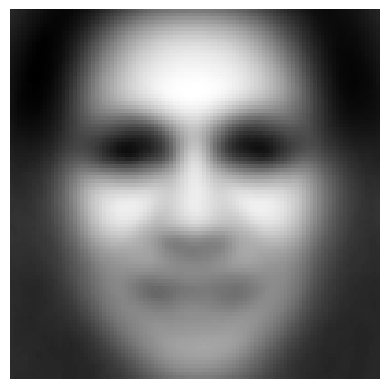

In [9]:
# visualize mean_face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

In [10]:
#substract data with mean face
X_t = X - mean_face # transformed data

In [ ]:
"""# apply X_t data to PCA
--- find right number of companent-elbow
--- with right number compnent computer principal components

In [11]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [12]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.249891,0.249891,1
1,0.114821,0.364712,2
2,0.104635,0.469347,3
3,0.052486,0.521833,4
4,0.033285,0.555118,5


In [13]:
exp_var_df.set_index('principal_components',inplace=True)

<Axes: xlabel='principal_components'>

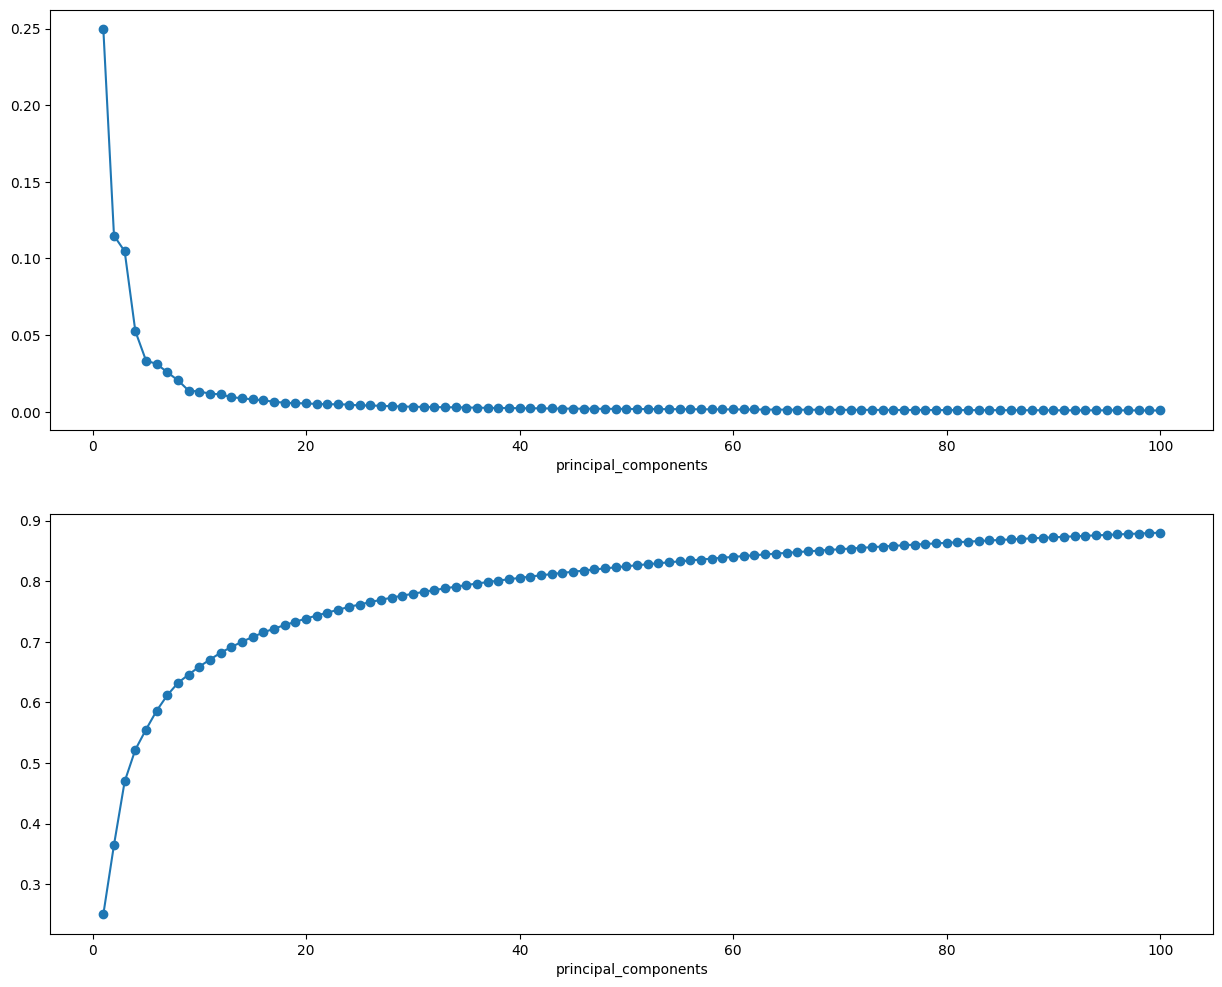

In [14]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

In [15]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [16]:
pca_data.shape

(4319, 50)

In [17]:
# saving data and models
y = data['gender'].values # independent variables
np.savez('./data/data_pca_50_target',pca_data,y)

In [18]:
# saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [20]:
#from pickle saving pca model to the model folder
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

In [22]:
####Visualize eigen image

In [23]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [24]:
pca_data_inv.shape

(4319, 10000)

In [26]:
eig_img= pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

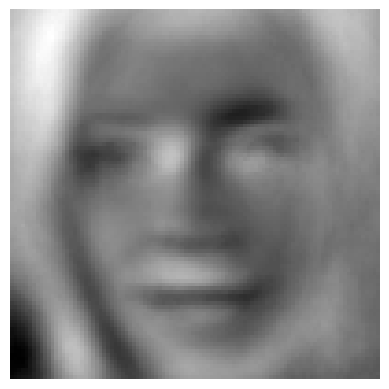

In [27]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

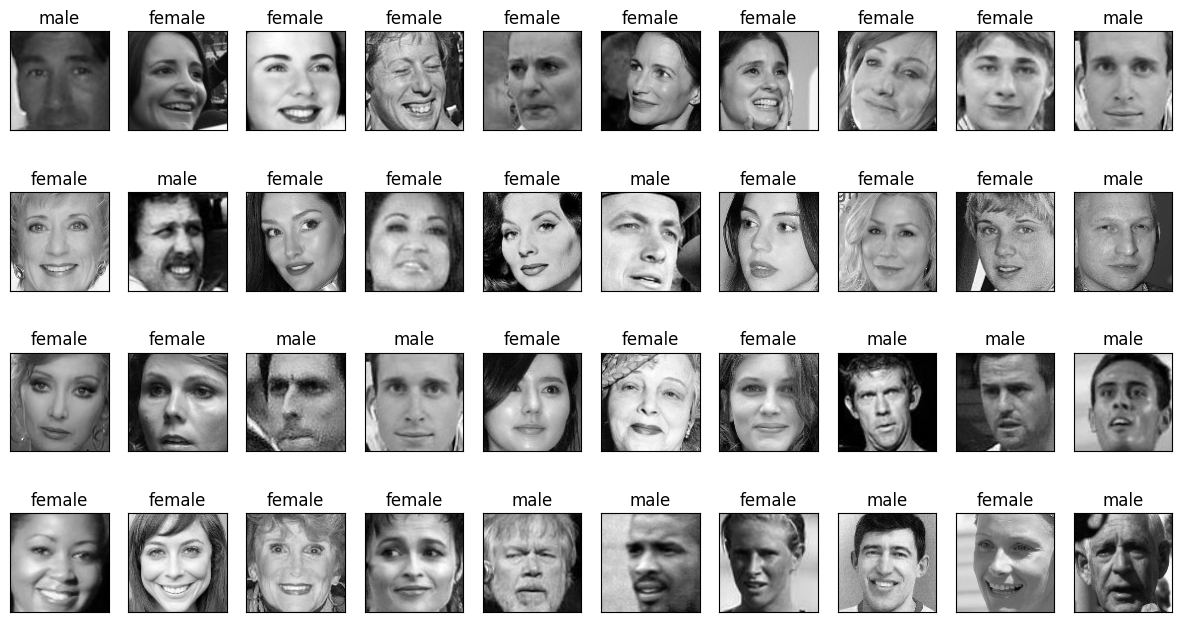

====================Eigen Images====================


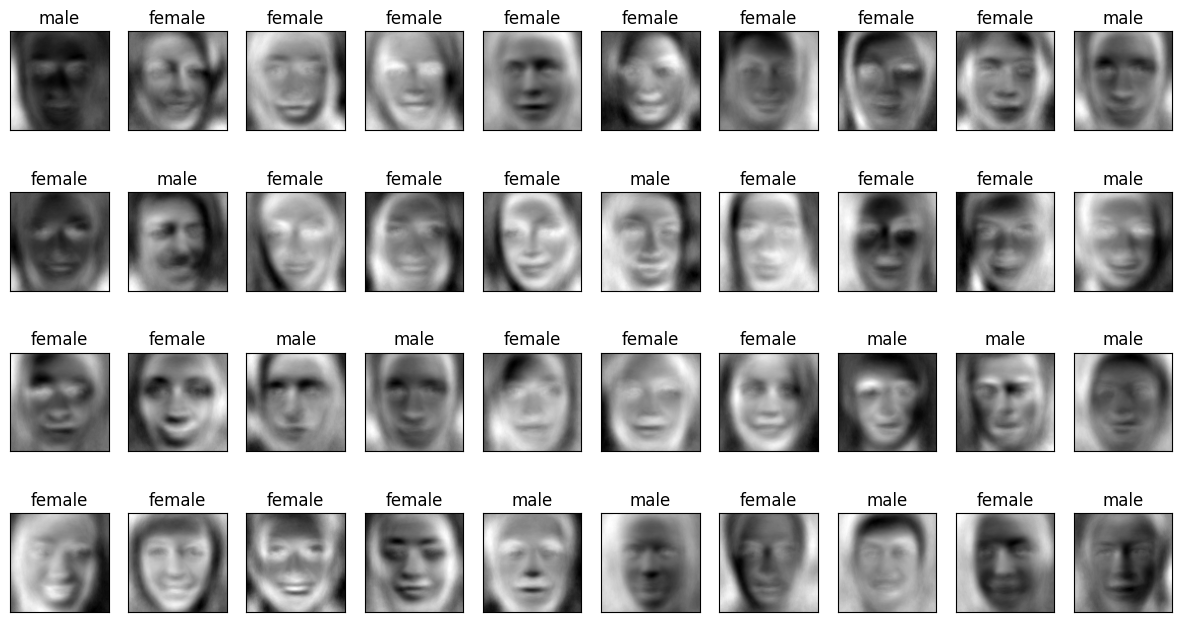

In [28]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()